In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model

class ModelDecorator:
    def __init__(self, Model, alpha):
        self.__model = Model(alpha)

    def train(self, X, y):
        self.__model.fit(X, y)
        return self

    def predict(self, X):
        return self.__model.predict(X)

    def error(self, X, y):
        return np.mean((self.__model.predict(X) - y) ** 2)

def getModel(Model):
    return lambda x: ModelDecorator(Model, x)

In [17]:
m = 50

def k_fold_validation(D_x, D_y, k_fold, Model, alpha_range):
    splits = np.split(np.arange(D_x.shape[0]), k_fold)
    train_error = np.zeros(len(alpha_range))
    validation_error = np.zeros(len(alpha_range))
    for k in range(k_fold):
        S = np.delete(D_x, splits[k], axis=0), np.delete(D_y, splits[k], axis=0)
        V = np.take(D_x, splits[k], axis=0), np.take(D_y, splits[k], axis=0)
        h = [Model(k).train(*S) for k in alpha_range]

        train_error += [h_i.error(*S) for h_i in h]
        validation_error += [h_i.error(*V) for h_i in h]

    return np.array(train_error) / k_fold, validation_error / k_fold

In [18]:
X, y = datasets.load_diabetes(return_X_y=True)

In [19]:
Lasso = getModel(linear_model.Lasso)
Ridge = getModel(linear_model.Ridge)
Regression = getModel(linear_model.LinearRegression)

D = X[:m], y[:m]
T = X[m:], y[m:]

C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35833.61083553426, tolerance: 22.5674375
  positive)
C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if sys.path[0] == '':
C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packag

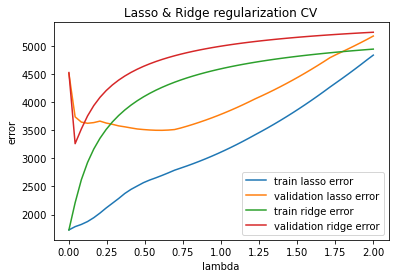

In [20]:
alpha_range = np.linspace(0, 2, num=50)
l_train_errors, l_validation_errors = k_fold_validation(*D, 5, Lasso, alpha_range)
r_train_errors, r_validation_errors = k_fold_validation(*D, 5, Ridge, alpha_range)

plt.plot(alpha_range, l_train_errors, label='train lasso error')
plt.plot(alpha_range, l_validation_errors, label='validation lasso error')
plt.plot(alpha_range, r_train_errors, label='train ridge error')
plt.plot(alpha_range, r_validation_errors, label='validation ridge error')
plt.xlabel('lambda')
plt.ylabel('error')
plt.title('Lasso & Ridge regularization CV')
plt.legend()
plt.show()

In [21]:
best_ridge = alpha_range[np.argmin(r_validation_errors)]
best_lasso = alpha_range[np.argmin(l_validation_errors)]
print(best_ridge, best_lasso)

0.04081632653061224 0.6122448979591836


In [23]:
test_ridge = Ridge(best_ridge).train(*D).error(*T)
test_lasso = Ridge(best_lasso).train(*D).error(*T)
test_regression = Regression(None).train(*D).error(*T)

print(test_ridge)
print(test_lasso)
print(test_regression)

3192.055352715052
4607.256278722313
42020.990868476896


C:\Users\dorro\Anaconda3\envs\iml.env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
